In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
X = pd.read_csv('logisticX.csv')
Y = pd.read_csv('logisticY.csv')
X = X.values
Y = Y.values
print(Y.shape)

(99, 1)


In [35]:
u = X.mean(axis=0)
std = X.std(axis=0)
print(u)
print(std)
X = (X-u)/std;
u = X.mean(axis=0)
std = X.std(axis=0)
print(np.round(u))
print(std)

[ 4.62606263  4.52602323]
[ 1.32353523  1.39379711]
[-0.  0.]
[ 1.  1.]


In [36]:
print(type(X))
print(X.shape)
ones = np.ones((99,1))
X = np.hstack((ones,X))
print(X.shape)

<class 'numpy.ndarray'>
(99, 2)
(99, 3)


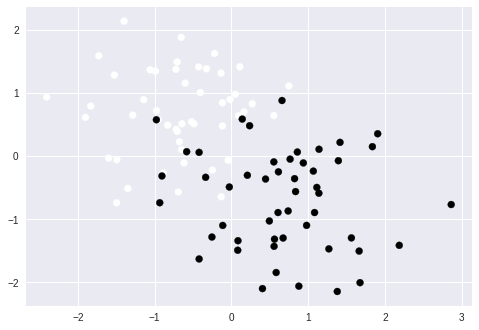

In [37]:
plt.style.use('seaborn')
plt.scatter(X[:,1],X[:,2],c=Y[:,0])
plt.show()

In [40]:

def sigmoid(z):
    return 1/(1.0+np.exp(-z))
def getYPred(theta,X):
    return sigmoid(np.dot(X,theta))
def error(X,Y,theta):
    Y_ = getYPred(theta,X)
    e = 0
    e+= np.sum(Y*np.log(Y_))
    e+= np.sum((1-Y)*np.log(1-Y_))
    return -e/X.shape[0];
def gradDescent(X,Y,lr,itr=1000):
    theta = np.zeros((X.shape[1],1))
    errorList = []
    for i in range(itr):
        grad = getGrad(X,Y,theta)
        theta = theta - lr*grad
        e = error(X,Y,theta)
        errorList.append(e)
    return theta,errorList;
def getGrad(X,Y,theta):
    Y_ = getYPred(theta,X)
    grad = np.dot(X.T,(Y_-Y))
    return grad;

In [48]:
theta,errorlist = gradDescent(X,Y,0.001)

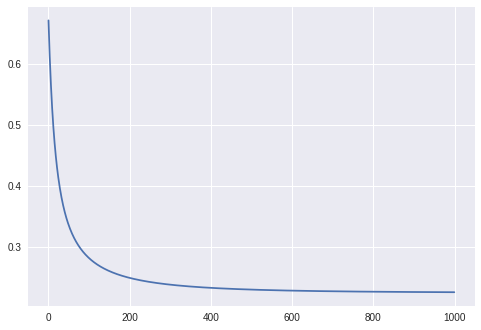

In [49]:
plt.plot(errorlist)
plt.show()

In [ ]:
np.linespace(0,10,5) #generate 5 equally spaced numbers iin 0 to 10

In [58]:
def visualizeSurface():
    plt.scatter(X[:,1],X[:,2],c=Y[:,0],cmap=plt.cm.Accent_r)
    x_1 = np.linspace(-3,3,5)
    x_2 = -(theta[0]+theta[1]*x_1)/theta[2]
    plt.plot(x_1,x_2, color='red')
    plt.show()

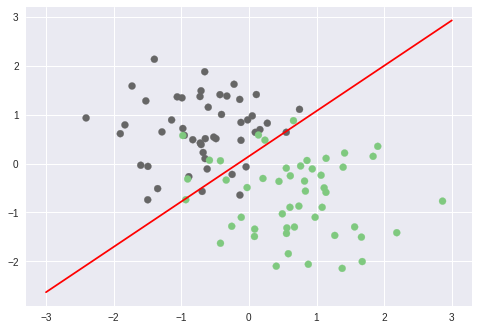

In [59]:
visualizeSurface()

In [63]:
def predict(theta, X):
    Y_pred = getYPred(theta, X)
    outputs = np.zeros(Y_pred.shape)
    outputs[Y_pred>=0.5]= 1
    return outputs

In [64]:
outputs = predict(theta,X)

In [66]:
accuracy = np.sum(outputs==Y)/X.shape[0];
print("%.2f Accuracy"%(accuracy*100))

87.88 Accuracy
